In [ ]:
# ESGUERRA, Edrine Frances A.
# CANAPE, Cyrus Benjamin C.
# 3CSC

Import Libraries

In [141]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error


Load the Data: Amazon

In [142]:
dataset = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date',
parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


Split the Data(train and test)

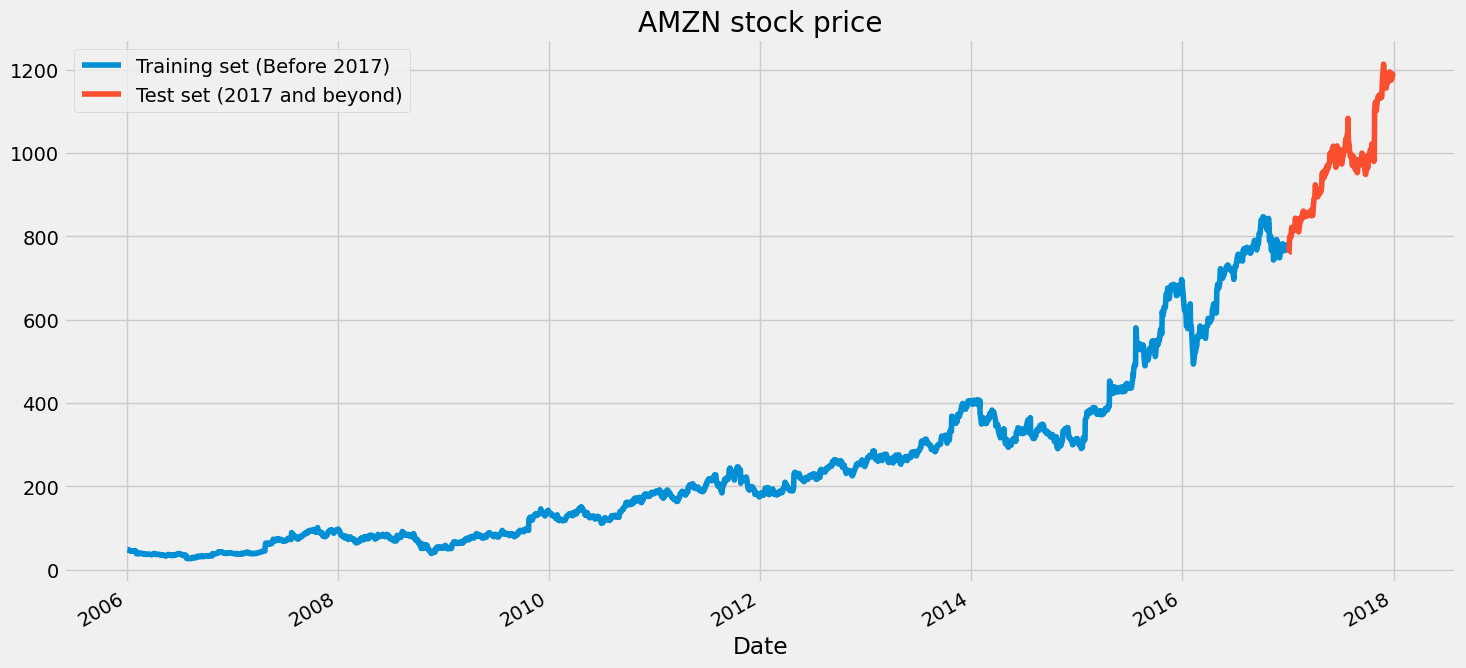

In [143]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,8),legend=True)
dataset["High"]['2017':].plot(figsize=(16,8),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('AMZN stock price')
plt.show()

Preprocess the Data

In [144]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Convert Inputs for RNN

In [145]:
# Since LSTMs store long term memory state, we create a data structure with 60
#timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(60,2768):
 X_train.append(training_set_scaled[i-60:i,0])
 y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)


(2708, 60, 1)


LSTM Base Model

In [146]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dropout, Dense

# The LSTM architecture
LSTM_Model = Sequential()
# First LSTM layer with Dropout regularisation
LSTM_Model.add(Input(shape=(X_train.shape[1],1)))
LSTM_Model.add(LSTM(units=5, return_sequences=True))
# Second LSTM layer
LSTM_Model.add(LSTM(units=5))
# The output layer
LSTM_Model.add(Dense(units=1))
# Compiling the RNN
LSTM_Model.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
LSTM_Model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0370
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0011
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.5820e-04
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.5488e-04
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 5.3489e-04
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 5.6945e-04
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.7108e-04
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.7399e-04
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.0821e-04
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.9981e-04


GRU Base Model

In [147]:
from keras.models import Sequential
from keras.layers import Input, GRU, Dropout, Dense

# The GRU architecture
GRU_Model = Sequential()
# First GRU layer with Dropout regularisation
GRU_Model.add(Input(shape=(X_train.shape[1], 1)))
GRU_Model.add(GRU(units=5, return_sequences=True))
GRU_Model.add(Dropout(0.2))

# Second GRU layer
GRU_Model.add(GRU(units=5))
GRU_Model.add(Dropout(0.2))

# The output layer
GRU_Model.add(Dense(units=1))
# Compiling the RNN
GRU_Model.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
GRU_Model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0656
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0100
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0059
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0062
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0053
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0052
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0046
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0050
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0046
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0039


BiRNN Base Model

In [148]:
from keras.models import Sequential
from keras.layers import Input, GRU, Dropout, Dense, Bidirectional

# The Bidirectional GRU architecture
BiRNN_Model = Sequential()
# First Bidirectional GRU layer with Dropout
BiRNN_Model.add(Input(shape=(X_train.shape[1], 1)))
BiRNN_Model.add(Bidirectional(GRU(units=5, return_sequences=True)))
BiRNN_Model.add(Dropout(0.2))

# Second Bidirectional GRU layer
BiRNN_Model.add(Bidirectional(GRU(units=5)))
BiRNN_Model.add(Dropout(0.2))

# Output layer
BiRNN_Model.add(Dense(units=1))
# Compile the model
BiRNN_Model.compile(optimizer='rmsprop', loss='mean_squared_error')
# Train the model
BiRNN_Model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0162
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0070
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0053
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0050
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0043
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0035
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0031
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0030
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0028
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0025


Base LSTM: Prepare Data for Testing

In [149]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
 X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_Prediction = LSTM_Model.predict(X_test)
LSTM_Prediction = sc.inverse_transform(LSTM_Prediction)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Base GRU Model: Prepare Data for Testing

In [150]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
 X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_Prediction = GRU_Model.predict(X_test)
GRU_Prediction = sc.inverse_transform(GRU_Prediction)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Base BiRNN Model: Prepare Data for Testing

In [151]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
 X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
BiRNN_Prediction = BiRNN_Model.predict(X_test)
BiRNN_Prediction = sc.inverse_transform(BiRNN_Prediction)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


Base LSTM: Evaluation and Testing

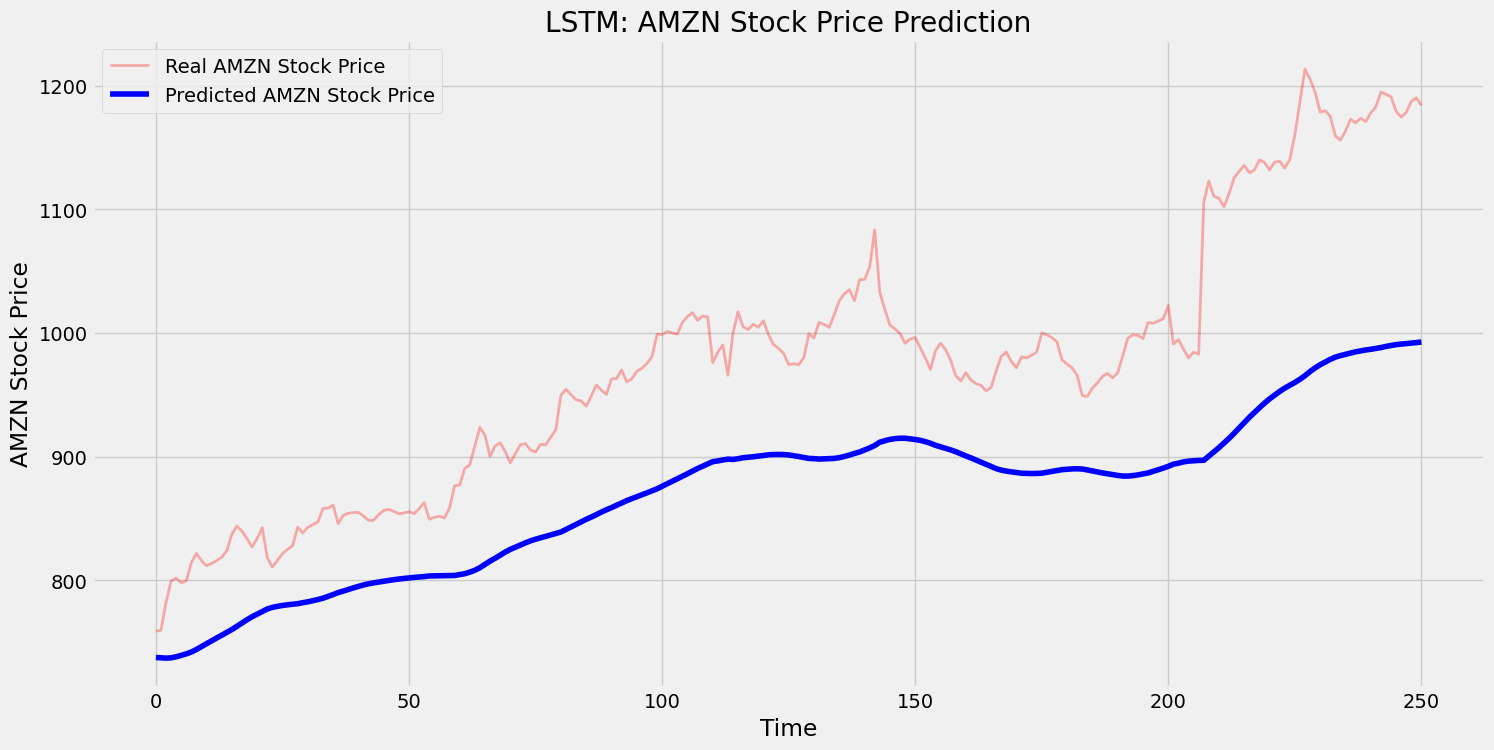

The root mean squared error is 115.58685799579189.


In [152]:
# Some functions to help out with
def plot_predictions(test,predicted):
 plt.figure(figsize=(16, 8))
 plt.plot(test, color='red',label='Real AMZN Stock Price', alpha=0.3,linewidth=2)
 plt.plot(predicted, color='blue',label='Predicted AMZN Stock Price')
 plt.title('LSTM: AMZN Stock Price Prediction')
 plt.xlabel('Time')
 plt.ylabel('AMZN Stock Price')
 plt.legend()
 plt.show()
def return_rmse(test,predicted):
 lstm_rmse = math.sqrt(mean_squared_error(test, predicted))
 print("The root mean squared error is {}.".format(lstm_rmse))
# Visualizing the results for LSTM
plot_predictions(test_set,LSTM_Prediction)
# Evaluating our model
return_rmse(test_set,LSTM_Prediction)

Base GRU: Evaluation and Testing

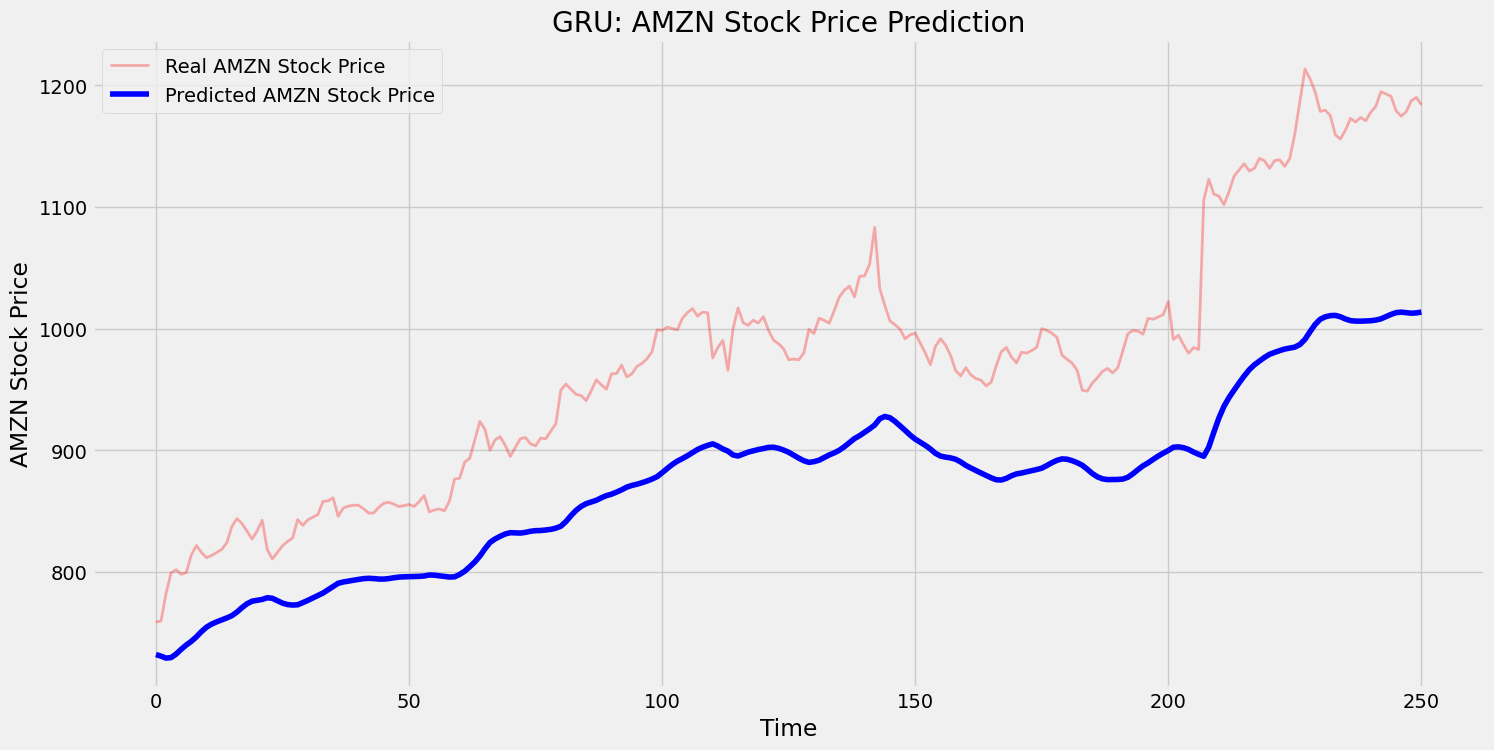

The root mean squared error is 108.17077074136193.


In [153]:
# Some functions to help out with
def plot_predictions(test,predicted):
 plt.figure(figsize=(16, 8))
 plt.plot(test, color='red',label='Real AMZN Stock Price', alpha=0.3,linewidth=2)
 plt.plot(predicted, color='blue',label='Predicted AMZN Stock Price')
 plt.title('GRU: AMZN Stock Price Prediction')
 plt.xlabel('Time')
 plt.ylabel('AMZN Stock Price')
 plt.legend()
 plt.show()
def return_rmse(test,predicted):
 gru_rmse = math.sqrt(mean_squared_error(test, predicted))
 print("The root mean squared error is {}.".format(gru_rmse))
# Visualizing the results for LSTM
plot_predictions(test_set,GRU_Prediction)
# Evaluating our model
return_rmse(test_set,GRU_Prediction)

Base BiRNN: Evaluation and Testing

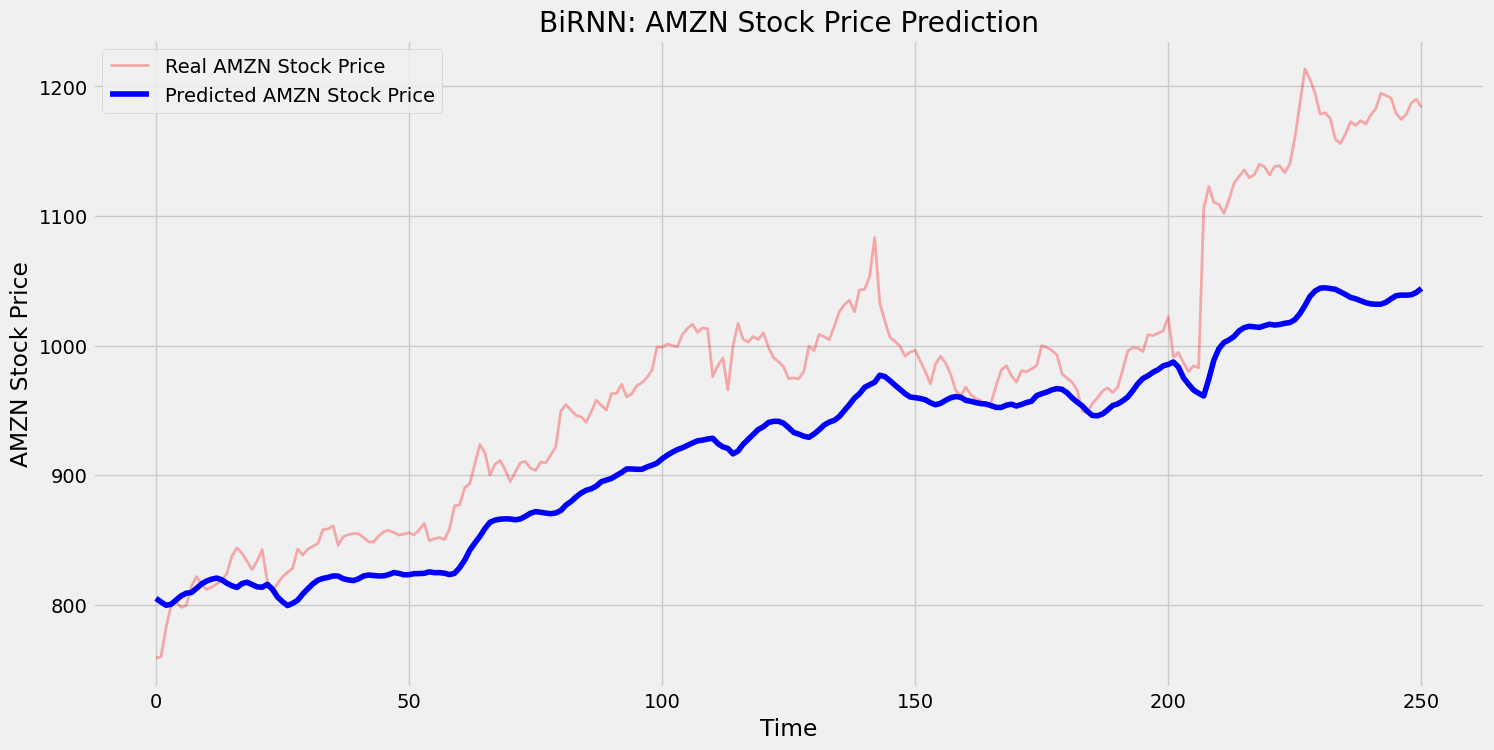

The root mean squared error is 70.61299758808174.


In [154]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.figure(figsize=(16, 8))
    plt.plot(test, color='red',label='Real AMZN Stock Price', alpha=0.3,linewidth=2)
    plt.plot(predicted, color='blue',label='Predicted AMZN Stock Price')
    plt.title('BiRNN: AMZN Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('AMZN Stock Price')
    plt.legend()
    plt.show()
def return_rmse(test,predicted):
 birnn_rmse = math.sqrt(mean_squared_error(test, predicted))
 print("The root mean squared error is {}.".format(birnn_rmse))
# Visualizing the results for LSTM
plot_predictions(test_set,BiRNN_Prediction)
# Evaluating our model
return_rmse(test_set,BiRNN_Prediction)

In [155]:
print(f"LSTM RMSE:")
return_rmse(test_set,LSTM_Prediction)
print(f"GRU RMSE:")
return_rmse(test_set,GRU_Prediction)
print(f"BiRNN RMSE:")
return_rmse(test_set,BiRNN_Prediction)


LSTM RMSE:
The root mean squared error is 115.58685799579189.
GRU RMSE:
The root mean squared error is 108.17077074136193.
BiRNN RMSE:
The root mean squared error is 70.61299758808174.


Experiments for LSTM (Base Model)

LSTM with More Batch Size

In [156]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dropout, Dense

# The LSTM architecture
LSTM_Batch_Model = Sequential()
# First LSTM layer with Dropout regularisation
LSTM_Batch_Model.add(Input(shape=(X_train.shape[1], 1)))
LSTM_Batch_Model.add(LSTM(units=5, return_sequences=True))
LSTM_Batch_Model.add(Dropout(0.2))

# Second LSTM layer
LSTM_Batch_Model.add(LSTM(units=5))
LSTM_Batch_Model.add(Dropout(0.2))

# The output layer
LSTM_Batch_Model.add(Dense(units=1))
# Compiling the RNN
LSTM_Batch_Model.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set with increased batch size
LSTM_Batch_Model.fit(X_train, y_train, epochs=10, batch_size=64)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0969
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0213
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0098
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0090
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0067
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0065
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0057
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0061
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0048
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0049


LSTM with More Layers

In [157]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dropout, Dense

# The deeper LSTM architecture
LSTM_Layers_Model = Sequential()
# First LSTM layer with Dropout regularisation
LSTM_Layers_Model.add(Input(shape=(X_train.shape[1], 1)))
LSTM_Layers_Model.add(LSTM(units=50, return_sequences=True))
LSTM_Layers_Model.add(Dropout(0.2))
# Second LSTM layer with Dropout
LSTM_Layers_Model.add(LSTM(units=50, return_sequences=True))
LSTM_Layers_Model.add(Dropout(0.2))
# Third LSTM layer
LSTM_Layers_Model.add(LSTM(units=50))
LSTM_Layers_Model.add(Dropout(0.2))
# The output layer
LSTM_Layers_Model.add(Dense(units=1))
# Compiling the RNN
LSTM_Layers_Model.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
LSTM_Layers_Model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 0.0172
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0030
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0027
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0021
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0021
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0017
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0018
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0015
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0016
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0014


LSTM with Lower Learning Rate

In [158]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dropout, Dense
from keras.optimizers import RMSprop

# The LSTM architecture with custom learning rate
LSTM_LR_Model = Sequential()
# First LSTM layer with Dropout regularisation
LSTM_LR_Model.add(Input(shape=(X_train.shape[1], 1)))
LSTM_LR_Model.add(LSTM(units=5, return_sequences=True))
LSTM_LR_Model.add(Dropout(0.2))

# Second LSTM layer
LSTM_LR_Model.add(LSTM(units=5))
LSTM_LR_Model.add(Dropout(0.2))

# The output layer
LSTM_LR_Model.add(Dense(units=1))
# Compiling the RNN with custom learning rate
opt = RMSprop(learning_rate=0.0005)
LSTM_LR_Model.compile(optimizer=opt, loss='mean_squared_error')
# Fitting to the training set
LSTM_LR_Model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1619
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0692
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0315
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0073
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0071
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0061
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0056
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0049
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045


Data Testing: LSTM Batch Model

In [159]:
# Preparing the input data for prediction
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Preparing X_test
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting the stock price with LSTM_Batch_Model
LSTM_Batch_Prediction = LSTM_Batch_Model.predict(X_test)
LSTM_Batch_Prediction = sc.inverse_transform(LSTM_Batch_Prediction)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Data Testing: LSTM Layers Model

In [160]:
# Preparing the input data for prediction
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Preparing X_test
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting the stock price with LSTM_Layers_Model
LSTM_Layers_Prediction = LSTM_Layers_Model.predict(X_test)
LSTM_Layers_Prediction = sc.inverse_transform(LSTM_Layers_Prediction)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


Data Testing: LSTM LR Model

In [161]:
# Preparing the input data for prediction
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Preparing X_test
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting the stock price with LSTM_LR_Model
LSTM_LR_Prediction = LSTM_LR_Model.predict(X_test)
LSTM_LR_Prediction = sc.inverse_transform(LSTM_LR_Prediction)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Evalutation and Testing: LSTM Batch

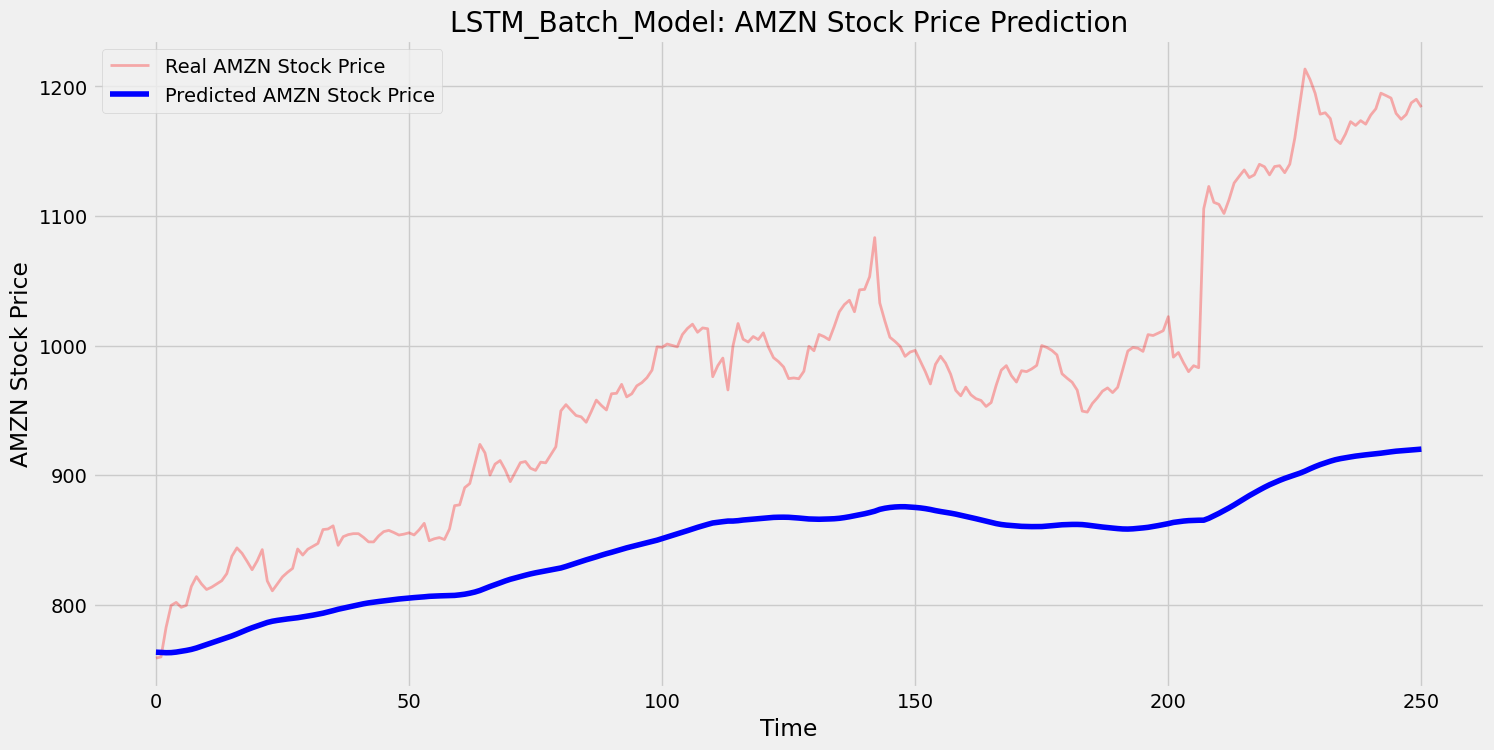

The root mean squared error is 145.73745303206675.


In [162]:
# Some functions to help out with
def plot_predictions(test, predicted):
    plt.figure(figsize=(16, 8))
    plt.plot(test, color='red', label='Real AMZN Stock Price', alpha=0.3, linewidth=2)
    plt.plot(predicted, color='blue', label='Predicted AMZN Stock Price')
    plt.title('LSTM_Batch_Model: AMZN Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('AMZN Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    lstm_rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(lstm_rmse))

# Visualizing the results for LSTM_Batch_Model
plot_predictions(test_set, LSTM_Batch_Prediction)
# Evaluating the model
return_rmse(test_set, LSTM_Batch_Prediction)


Evaluation and Testing: LSTM Layers

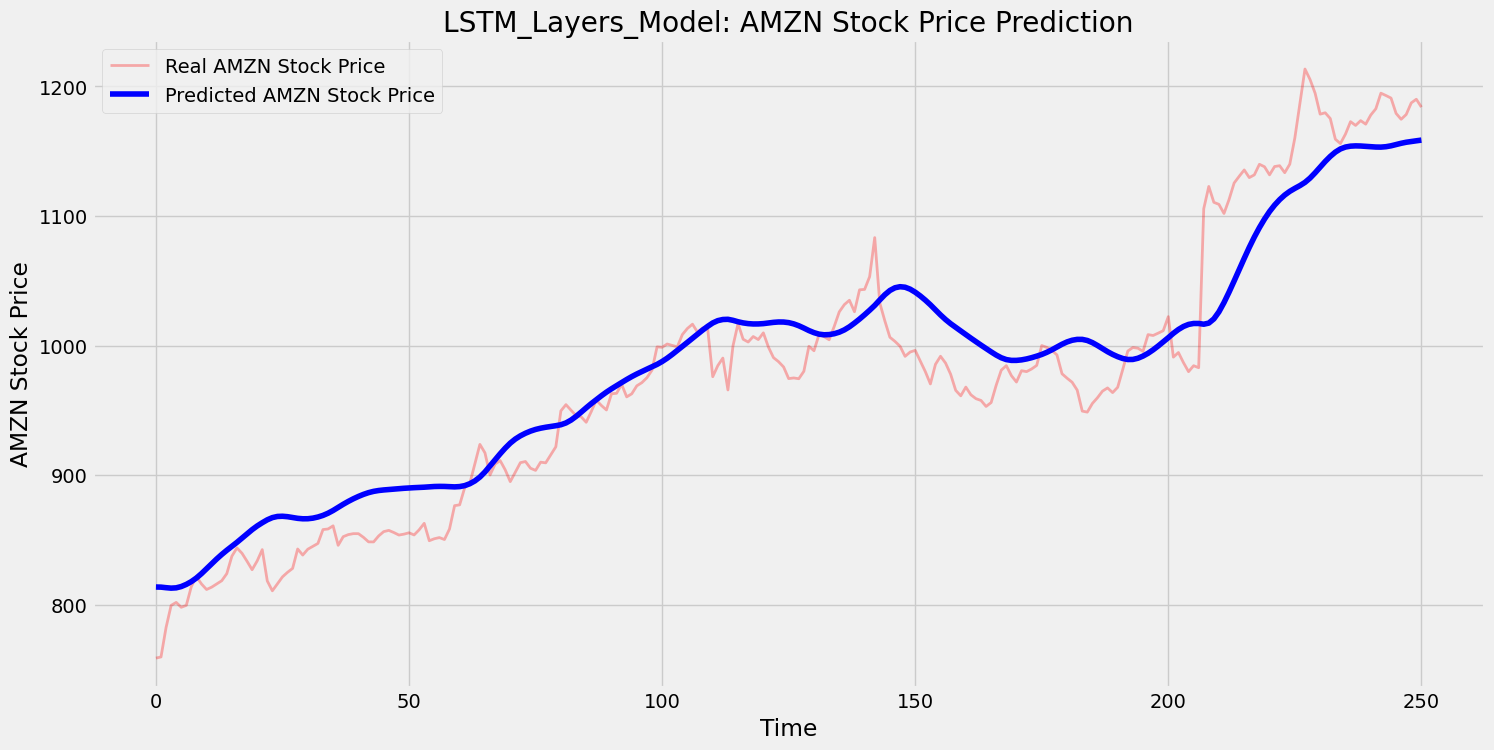

The root mean squared error is 32.63958751389174.


In [163]:
# Some functions to help out with
def plot_predictions(test, predicted):
    plt.figure(figsize=(16, 8))
    plt.plot(test, color='red', label='Real AMZN Stock Price', alpha=0.3, linewidth=2)
    plt.plot(predicted, color='blue', label='Predicted AMZN Stock Price')
    plt.title('LSTM_Layers_Model: AMZN Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('AMZN Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    lstm_rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(lstm_rmse))

# Visualizing the results for LSTM_Layers_Model
plot_predictions(test_set, LSTM_Layers_Prediction)
# Evaluating the model
return_rmse(test_set, LSTM_Layers_Prediction)


Evalutation and Testing: LSTM LR

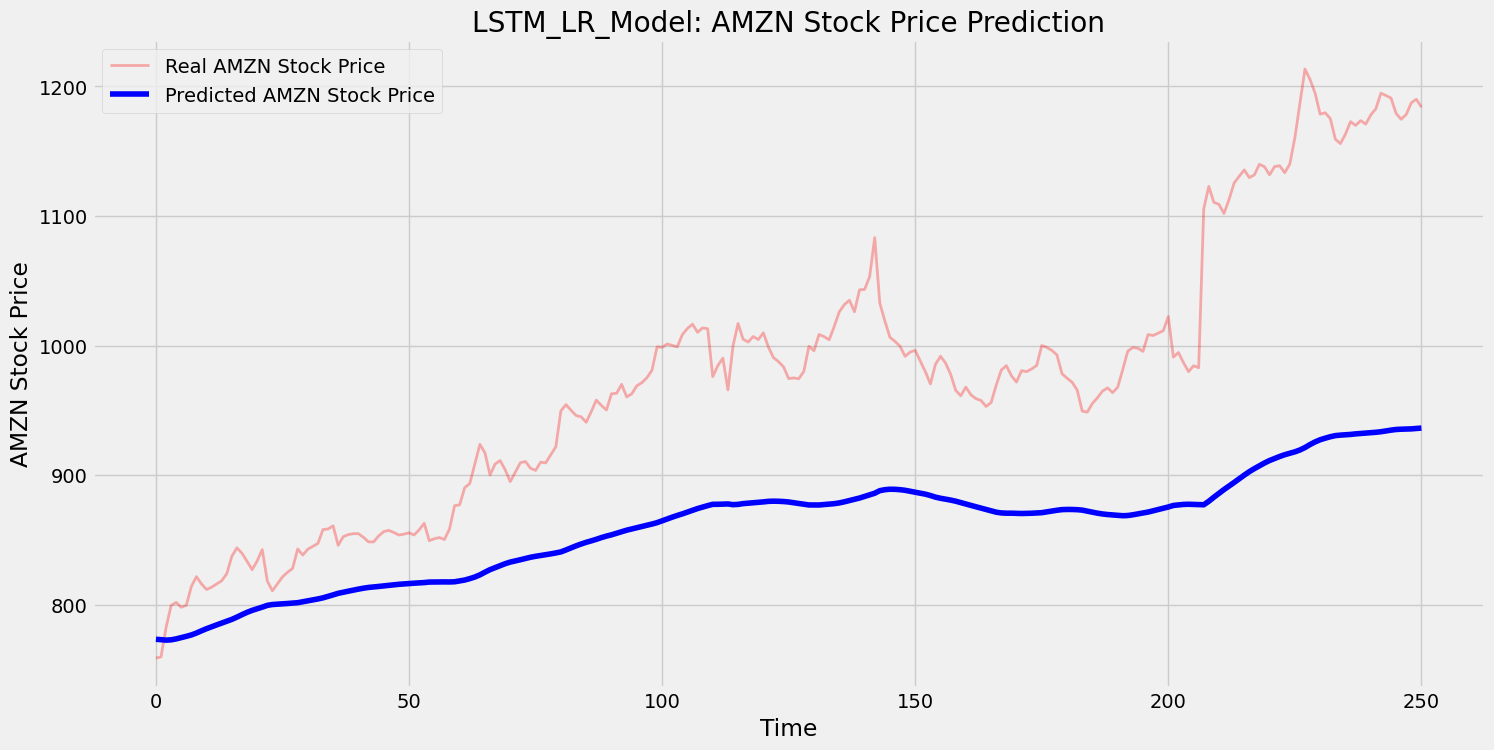

The root mean squared error is 133.60080832643166.


In [164]:
# Some functions to help out with
def plot_predictions(test, predicted):
    plt.figure(figsize=(16, 8))
    plt.plot(test, color='red', label='Real AMZN Stock Price', alpha=0.3, linewidth=2)
    plt.plot(predicted, color='blue', label='Predicted AMZN Stock Price')
    plt.title('LSTM_LR_Model: AMZN Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('AMZN Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    lstm_rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(lstm_rmse))

# Visualizing the results for LSTM_LR_Model
plot_predictions(test_set, LSTM_LR_Prediction)
# Evaluating the model
return_rmse(test_set, LSTM_LR_Prediction)


In [165]:
print("LSTM_Batch_Model RMSE:")
return_rmse(test_set, LSTM_Batch_Prediction)

print("LSTM_Layers_Model RMSE:")
return_rmse(test_set, LSTM_Layers_Prediction)

print("LSTM_LR_Model RMSE:")
return_rmse(test_set, LSTM_LR_Prediction)

LSTM_Batch_Model RMSE:
The root mean squared error is 145.73745303206675.
LSTM_Layers_Model RMSE:
The root mean squared error is 32.63958751389174.
LSTM_LR_Model RMSE:
The root mean squared error is 133.60080832643166.


Final RMSE Predictions

In [166]:
print(f"LSTM RMSE:")
return_rmse(test_set,LSTM_Prediction)
print(f"GRU RMSE:")
return_rmse(test_set,GRU_Prediction)
print(f"BiRNN RMSE:")
return_rmse(test_set,BiRNN_Prediction)
print("LSTM_Batch_Model RMSE:")
return_rmse(test_set, LSTM_Batch_Prediction)
print("LSTM_Layers_Model RMSE:")
return_rmse(test_set, LSTM_Layers_Prediction)
print("LSTM_LR_Model RMSE:")
return_rmse(test_set, LSTM_LR_Prediction)

LSTM RMSE:
The root mean squared error is 115.58685799579189.
GRU RMSE:
The root mean squared error is 108.17077074136193.
BiRNN RMSE:
The root mean squared error is 70.61299758808174.
LSTM_Batch_Model RMSE:
The root mean squared error is 145.73745303206675.
LSTM_Layers_Model RMSE:
The root mean squared error is 32.63958751389174.
LSTM_LR_Model RMSE:
The root mean squared error is 133.60080832643166.


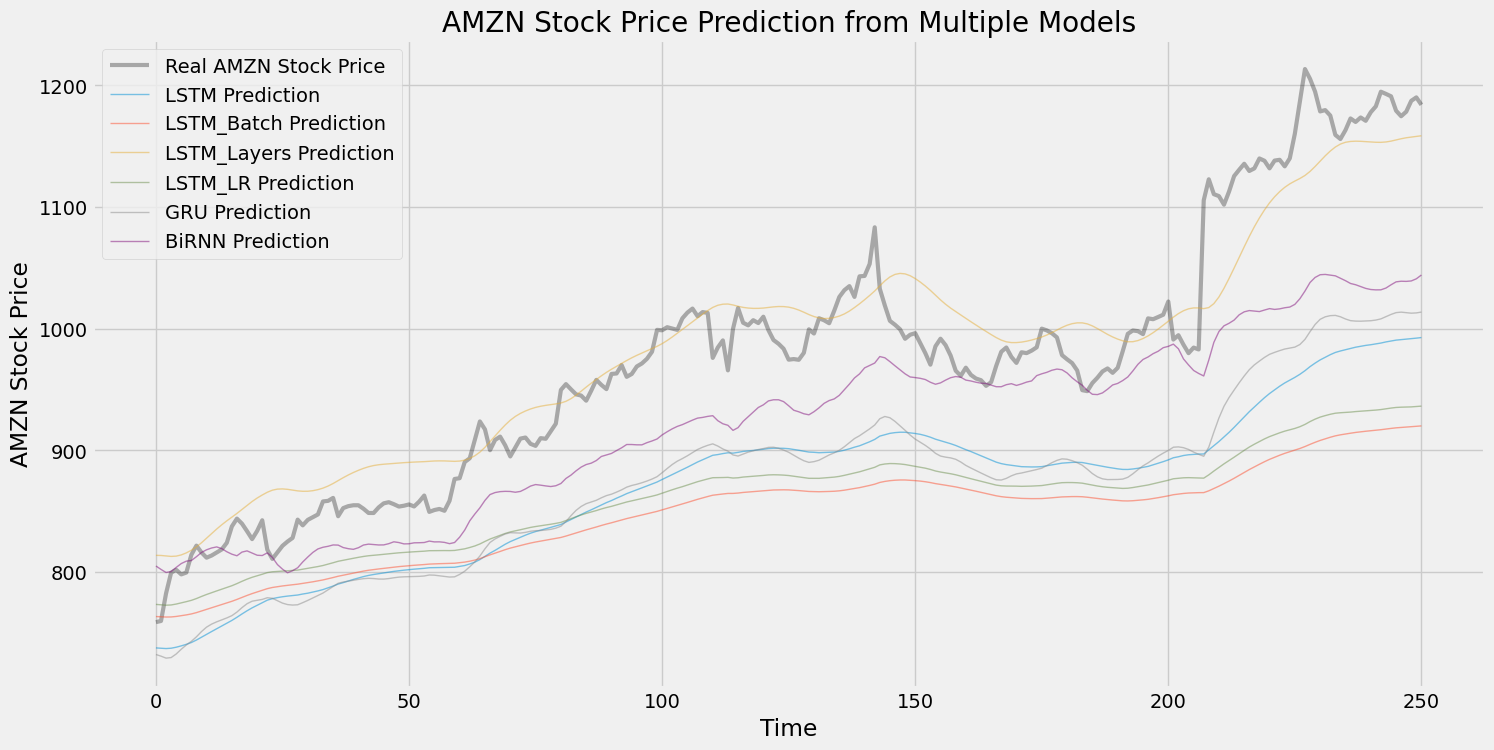

In [167]:
def plot_multiple_predictions(test, predictions_dict):
    """
    Plots the real stock prices and multiple model predictions.

    Parameters:
    - test: The actual test set values (e.g., test_set)
    - predictions_dict: A dictionary with {model_name: prediction_array}
    """
    plt.figure(figsize=(16, 8))
    plt.plot(test, color='black', label='Real AMZN Stock Price', alpha=0.3, linewidth=3)

    for model_name, prediction in predictions_dict.items():
        plt.plot(prediction, label=f'{model_name} Prediction', alpha=0.5,linewidth=1)

    plt.title('AMZN Stock Price Prediction from Multiple Models')
    plt.xlabel('Time')
    plt.ylabel('AMZN Stock Price')
    plt.legend()
    plt.show()

plot_multiple_predictions(test_set,
    {
        "LSTM": LSTM_Prediction,
        "LSTM_Batch": LSTM_Batch_Prediction,
        "LSTM_Layers": LSTM_Layers_Prediction,
        "LSTM_LR": LSTM_LR_Prediction,
        "GRU": GRU_Prediction,
        "BiRNN": BiRNN_Prediction
    }
)

